In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
from tensorflow import keras 
import tensorflow 
import torch 

2023-05-17 22:46:45.285793: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-05-17 22:46:45.287556: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-17 22:46:45.319237: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-17 22:46:45.319842: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-17 22:46:45.898846: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

In [2]:
torch.__version__

'2.0.0+cu117'

# Transformer Data Setup 

Defining methods to set up data to return sequences of varying lengths (n_steps) for x and y:


We also plan to try to clean up the data more exhaustively.

In [3]:
TransformerData = pd.read_csv("/home/jik19004/FilesToRun/DINGRESEARCH/DingResearchDec28th/DingLSTMFolder/FINALIZED_DATA.csv")
display(TransformerData)

,Demand,Annual Usage (kWh),Year,Month,Day,Hour,WeekDay or Weekend,HVN_lon,HVN_lat,HVN_tmpf,...,DXR_drct,DXR_sknt,DXR_vsby,MMK_lon,MMK_lat,MMK_tmpf,MMK_drct,MMK_sknt,MMK_vsby,HotTemperatures
0,3053.00,13244.454545,2011,1,1,0,0,-72.8868,41.2638,33.980000,...,0.000000,0.000000,5.000000,-72.83,41.51,28.94,0.0,0.0,4.0,0
1,2892.00,13244.454545,2011,1,1,1,0,-72.8868,41.2638,37.940000,...,0.000000,0.000000,5.000000,-72.83,41.51,28.94,0.0,0.0,4.0,0
2,2774.00,13244.454545,2011,1,1,2,0,-72.8868,41.2638,37.040000,...,0.000000,0.000000,4.000000,-72.83,41.51,33.08,150.0,5.0,5.0,0
3,2710.00,13244.454545,2011,1,1,3,0,-72.8868,41.2638,33.980000,...,0.000000,0.000000,4.000000,-72.83,41.51,33.08,150.0,4.0,6.0,0
4,2698.00,13244.454545,2011,1,1,4,0,-72.8868,41.2638,30.920000,...,0.000000,0.000000,4.000000,-72.83,41.51,28.94,100.0,3.0,5.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96422,3310.60,14064.500000,2021,12,31,19,1,-72.8868,41.2638,46.133333,...,46.666667,1.333333,6.666667,-72.83,41.51,43.00,0.0,0.0,4.0,0
96423,3148.00,14064.500000,2021,12,31,20,1,-72.8868,41.2638,46.133333,...,46.666667,1.333333,6.666667,-72.83,41.51,43.00,0.0,0.0,4.0,0
96424,2988.93,14064.500000,2021,12,31,21,1,-72.8868,41.2638,46.133333,...,46.666667,1.333333,6.666667,-72.83,41.51,43.00,0.0,0.0,4.0,0
96425,2793.70,14064.500000,2021,12,31,22,1,-72.8868,41.2638,46.133333,...,46.666667,1.333333,6.666667,-72.83,41.51,43.00,0.0,0.0,4.0,0


In [4]:
DemandData = TransformerData.loc[:, "Demand"].copy()
TransformerData.drop("Demand", axis = 1,inplace = True)
display(TransformerData)

,Annual Usage (kWh),Year,Month,Day,Hour,WeekDay or Weekend,HVN_lon,HVN_lat,HVN_tmpf,HVN_drct,...,DXR_drct,DXR_sknt,DXR_vsby,MMK_lon,MMK_lat,MMK_tmpf,MMK_drct,MMK_sknt,MMK_vsby,HotTemperatures
0,13244.454545,2011,1,1,0,0,-72.8868,41.2638,33.980000,190.000000,...,0.000000,0.000000,5.000000,-72.83,41.51,28.94,0.0,0.0,4.0,0
1,13244.454545,2011,1,1,1,0,-72.8868,41.2638,37.940000,63.333333,...,0.000000,0.000000,5.000000,-72.83,41.51,28.94,0.0,0.0,4.0,0
2,13244.454545,2011,1,1,2,0,-72.8868,41.2638,37.040000,200.000000,...,0.000000,0.000000,4.000000,-72.83,41.51,33.08,150.0,5.0,5.0,0
3,13244.454545,2011,1,1,3,0,-72.8868,41.2638,33.980000,130.000000,...,0.000000,0.000000,4.000000,-72.83,41.51,33.08,150.0,4.0,6.0,0
4,13244.454545,2011,1,1,4,0,-72.8868,41.2638,30.920000,130.000000,...,0.000000,0.000000,4.000000,-72.83,41.51,28.94,100.0,3.0,5.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96422,14064.500000,2021,12,31,19,1,-72.8868,41.2638,46.133333,86.666667,...,46.666667,1.333333,6.666667,-72.83,41.51,43.00,0.0,0.0,4.0,0
96423,14064.500000,2021,12,31,20,1,-72.8868,41.2638,46.133333,86.666667,...,46.666667,1.333333,6.666667,-72.83,41.51,43.00,0.0,0.0,4.0,0
96424,14064.500000,2021,12,31,21,1,-72.8868,41.2638,46.133333,86.666667,...,46.666667,1.333333,6.666667,-72.83,41.51,43.00,0.0,0.0,4.0,0
96425,14064.500000,2021,12,31,22,1,-72.8868,41.2638,46.133333,86.666667,...,46.666667,1.333333,6.666667,-72.83,41.51,43.00,0.0,0.0,4.0,0


# Scaling Our Data so that one particular feature wouldn't dominate the loss in particular! 

# Splitting the Data into Training, Validation, and Testing! 

In [5]:
from keras_tuner import RandomSearch
from keras_tuner.engine.hyperparameters import HyperParameter 
import tensorflow as tf 
from tensorflow import keras as keras 

In [6]:
def return_sequences(data, outputData, input_n_steps, output_n_steps):
    X = []
    Y = []
    length = len(data)
    for i in range(0,length, output_n_steps):
        input_indx = i + input_n_steps
        output_indx = input_indx + output_n_steps 
        if (output_indx > len(data)): # we need to have equally split sequences. 
            break               # The remaining data that cannot fit into a fixed
                                # sequence will immediately be cut!
        else:
            Xsample = data.iloc[i:input_indx, :] # get the previous data
            Ysample = outputData[input_indx:output_indx]
            X.append(Xsample)
            Y.append(Ysample) 
    X = np.asarray(X).astype('float64')
    Y = np.asarray(Y).astype('float64')
    return (X, Y)


In [7]:
from sklearn.preprocessing import StandardScaler 
def scaleTheData(data):
    scaler = StandardScaler()
    # split the data first. 
    data2 = scaler.fit_transform(data)
    data = pd.DataFrame(data2, columns = data.columns)
    return data

def splitDataAndScale(data, output):
    
    TrainingData = scaleTheData(data.iloc[:61363, :].copy()) # The index for Janruary 1st 2018 basically, don't necessarily hard code it. 
    TrainingOutput = output[:61363].copy()

    RemainingData = data.iloc[61363:, :].copy()
    RemainingOutput = output[61363:].copy()

    ValidationData = scaleTheData(RemainingData.iloc[:int(0.5*len(RemainingData)), :].copy())
    ValidationOutput = RemainingOutput[:int(0.5*len(RemainingOutput))].copy()

    TestingData = scaleTheData(RemainingData.iloc[int(0.5 * len(RemainingData)):, :].copy())
    TestingOutput = RemainingOutput[int(0.5 * len(RemainingData)):].copy()

    TrainingSequences = return_sequences(TrainingData, TrainingOutput, 18, 6)

    TransformedTrainingData = TrainingSequences[0]
    TransformedTrainingOutput = TrainingSequences[1]

    ValidationSequences = return_sequences(ValidationData, ValidationOutput, 18,6)

    TransformedValidationData = ValidationSequences[0]
    TransformedValidationOutput = ValidationSequences[1]

    TestingSequences = return_sequences(TestingData, TestingOutput, 18, 6)

    TransformedTestingData = TestingSequences[0]
    TransformedTestingOutput = TestingSequences[1]



    return (TransformedTrainingData, TransformedTrainingOutput, TransformedValidationData, TransformedValidationOutput, 
    TransformedTestingData, TransformedTestingOutput)

In [8]:
data = splitDataAndScale(TransformerData, DemandData)

In [9]:
print(data[0].shape)

(10224, 18, 55)


In [10]:
print(data[2].shape)

(2919, 18, 55)


In [11]:
print(data[4].shape)

(2919, 18, 55)


In [12]:
trainingData = data[0]
trainingOutput = data[1]
validationData = data[2]
validationOutput = data[3]
testingData = data[4]
testingnOutput = data[5]

In [13]:
print(len(data[2]))

2919


In [14]:
TrainingData = [];  
for i in range(len(data[0])): 
    TrainingData.append((data[0][i], data[1][i]))

In [15]:
print(validationData.shape)
print(validationOutput.shape)

ValidationData = []; 
for i in range(len(data[2])):
    ValidationData.append((data[2][i], data[3][i]))


(2919, 18, 55)
(2919, 6)


# Transformer Model Construction1

In [16]:
import torch.nn as nn
import torch.optim as optim
import numpy as np
from torch.utils.data import Dataset, DataLoader

In [17]:
def getPositionalEncoding1(batch_size, seq_len, d, n = 10000):
        P = np.zeros((batch_size,seq_len, d))
        for z in range(batch_size):
            for k in range(seq_len):
                for i in np.arange(int(d/2)):
                    denominator = np.power(n, 2*i/d)
                    P[z, k, 2*i] = np.sin(k/denominator)
                    P[z,k, 2*i+1] = np.cos(k/denominator)
        P = torch.tensor(P).to()
        return torch.tensor(P)

print(type(getPositionalEncoding1(10, 10, 10)))


<class 'torch.Tensor'>


/tmp/ipykernel_5552/1688313836.py:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(P)


In [23]:
class TimeSeriesTransformer(nn.Module): 
    def __init__(self, num_layers, dropout = 0.2, outfeatures1 = 16, outfeatures2 = 16, dim_feedforward = 2048, output_num = 6):
        super().__init__()

        self.encoderLayer = nn.TransformerEncoderLayer(d_model = 55, nhead = 5, dropout= 0.2); 
        self.decoderLayer = nn.TransformerDecoderLayer(d_model = 55, nhead = 5, dropout = 0.2); #the dimension  

    
        self.Encoder = nn.TransformerEncoder(self.encoderLayer, num_layers = 4)
        self.Decoder = nn.TransformerDecoder(self.decoderLayer, num_layers = 4); 

        self.Model = nn.Transformer(d_model = 55, nhead = 5, num_encoder_layers = 4, num_decoder_layers= 4, dropout = 0.2,
                                    custom_encoder = self.Encoder, custom_decoder = self.Decoder); 
        # After this, we create two linear length layers to try to give us one dimensional output. 
        self.LinearLayer1 = nn.Linear(in_features = 55 * 18, out_features = 180); 
        self.Activation = nn.leakyReLU(negative_slope = 0.2); 
        self.LinearLayer2 = nn.Linear(in_features = 180, out_features = 1); 

    def getPositionalEncoding(self, batch_size = 128, seq_len = 18, d = 110, n = 10000, device = torch.device("cuda")):
        P = np.zeros((batch_size,seq_len, d))
        for z in range(batch_size):
            for k in range(seq_len):
                for i in np.arange(int(d/2)):
                    denominator = np.power(n, 2*i/d)
                    P[z, k, 2*i] = np.sin(k/denominator)
                    P[z,k, 2*i+1] = np.cos(k/denominator)
        P = torch.tensor(P)
        P = P.type("torch.FloatTensor")
        return P.to(device)


    
    def forward2(self, src, forecast_window:int, batch_size:int, batch_first: bool = False):
            tgt = src[:, -1, 0] 
            for i in range(forecast_window - 1):
                val = self.Model(src,tgt) 
                val = self.LinearLayer1(val); 
                val = self.Activation(val)
                val = self.LinearLayer2(val)
                tgt = torch.cat((tgt, val)) 
             

    

In [19]:
import optuna 
class TimeSeriesDataset(Dataset):
    def __init__(self, data, output):
        data = torch.tensor(data).float(); 
        output = torch.tensor(output).float() 

        self.data = data 
        self.output = output; 

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        x = self.data[idx];
        y = self.output[idx];
        return x, y;

# use the past 72 hours in advance and then predict the 1st hour, 6th hour, 12 hours! 

def evaluate(model, val_loader, criterion, device):
    model.eval()
    running_loss = 0.0
    with torch.no_grad():
        for data, target in val_loader:
            data = data.to(device)
            target = target.to(device)
            output = model(data)
            loss = criterion(output, target)
            running_loss += loss.item() * target.size(0)
    return running_loss / len(val_loader.dataset)

def Train_and_Evaluate(train_loader, val_loader, device, params, numEpochs, early_stop_epochs):
    #num_layers, dropout = 0.1, outfeatures1 = 16, outfeatures2 = 16, outfeatures3 = 16, outfeatures4 = 16, dim_feedforward = 2048, output_num = 6
    model = TimeSeriesTransformer(num_layers = params[0], outfeatures1 = params[1], outfeatures2 = params[2],
                                dim_feedforward = params[3], output_num = 6)
    model = model.to(device);
    LossFunction = torch.nn.L1Loss();
    best_val_loss = float('inf')
    early_stop_count = 0
    print("num layers:", params[0])
    print("outfeatures1:", params[1])
    print("outfeatures2:", params[2])
    print("dim_feedforward:", params[3])
    
    Optimizer = torch.optim.Adam(params = model.parameters())
    for epoch in range(0,numEpochs): 
        Training_Loss = 0; 
        total_samples = 0; 
        for input, output in train_loader:
            input = input.to(device); 
            output = torch.squeeze(output, 1); 
            output = output.to(device); 
            predictedVal = model(input)
            #predictedVal = torch.squeeze(predictedVal, 1)
            Optimizer.zero_grad();
            batchLoss = LossFunction(predictedVal, output);
            batchLoss.backward(); 
            Optimizer.step();
            Training_Loss += batchLoss * output.size(0) #* output.size(0);
            total_samples += output.size(0)
        Training_Loss = Training_Loss/total_samples


        Validation_Loss = 0; 
        print("passed ", epoch, "epoch", "Training Loss: ", Training_Loss," ", end = "")
        with torch.no_grad():
            total_val_samples = 0; 
            Validation_Loss = 0; 
            for val_input, val_output in val_loader:
                val_input = val_input.to(device); 
                val_output = torch.squeeze(val_output,1);
                val_output = val_output.to(device);

                predictedVal = model(val_input)
                Validation_Loss += LossFunction(val_output, predictedVal) * val_output.size(0)
                total_val_samples += val_output.size(0)
            Validation_Loss = Validation_Loss/total_val_samples
            print("Validation Loss: ", Validation_Loss)

            if Validation_Loss < best_val_loss:
                best_val_loss = Validation_Loss
                early_stop_count = 0;
            else:
                early_stop_count +=1 
            if early_stop_count >= early_stop_epochs:
                return best_val_loss; 
            
            

    return best_val_loss; 

def predict(model, data_loader, device):
    model.eval()
    predictions = []
    act_outputs = []
    with torch.no_grad():
        for data, _ in data_loader:
            data = data.to(device)
            output = model(data)
            predictions.append(output.cpu().numpy())
            act_outputs.append(_.numpy())

    return (np.concatenate(predictions), np.concatenate(act_outputs))

Validation_Loss = 0; 
        print("passed ", epoch, "epoch", "Training Loss: ", Training_Loss," ", end = "")
        with torch.no_grad():
            count1 = 0;
            for val_input, val_output in val_loader:
                val_input = val_input.to(device); 
                val_output = torch.squeeze(val_output,1);
                val_output = val_output.to(device);

                predictedVal = model(val_input);
                predictedVal = torch.squeeze(predictedVal, 1)
                batchLoss = LossFunction(val_output, predictedVal);
                Validation_Loss += batchLoss # * val_output.size(0);
                count1 += 
            Validation_Loss = Validation_Loss/count1
            print("Validation Loss: ", Validation_Loss)

            if Validation_Loss < best_val_loss:
                best_val_loss = Validation_Loss
                early_stop_count = 0;
            else:
                early_stop_count +=1 
            if early_stop_count >= early_stop_epochs:
                return best_val_loss; 

# GO DEAL WITH NAN VALUES IN OUR DATA!!!!

In [20]:
TrainingData = TimeSeriesDataset(data[0],data[1])
ValidationData = TimeSeriesDataset(data[2],data[3])
TestingData = TimeSeriesDataset(data[4],data[5])

In [21]:
TrainingLoader = DataLoader(TrainingData, batch_size = 256);
ValidationLoader = DataLoader(ValidationData, batch_size = 256);
TestingLoader = DataLoader(TestingData, batch_size = 256);

In [22]:
print(TrainingLoader)

In [50]:
def objective(trial):
    #num_layers = params[0], outfeatures = params[1], dim_feedforward = params[2]
    params = [trial.suggest_int("num_layers", low = 2, high = 4, step = 1), 
              trial.suggest_int("out_features1", low = 140, high = 180, step = 20),
              trial.suggest_int("out_features2", low = 96, high = 120, step = 12),
              trial.suggest_int("dim_feedforward", low = 256, high = 512, step = 64)];
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu");
    return Train_and_Evaluate(TrainingLoader, ValidationLoader ,device, params, 260,26); 

In [51]:
import joblib 
study_name = 'sqlite:///example6.db'
study = optuna.create_study(direction="minimize", sampler=optuna.samplers.TPESampler(), study_name= "Transformer6", load_if_exists= True, storage='sqlite:///example6.db')
joblib.dump(study, "study6.pkl") 
study.optimize(objective, n_trials = 60) 

[I 2023-04-21 08:24:08,829] Using an existing study with name 'Transformer6' instead of creating a new one.


num layers: 4
outfeatures1: 140
outfeatures2: 108
dim_feedforward: 448


[W 2023-04-21 08:24:10,628] Trial 29 failed with parameters: {'num_layers': 4, 'out_features1': 140, 'out_features2': 108, 'dim_feedforward': 448} because of the following error: KeyboardInterrupt().
Traceback (most recent call last):
  File "/home/jik19004/anaconda3/lib/python3.9/site-packages/optuna/study/_optimize.py", line 200, in _run_trial
    value_or_values = func(trial)
  File "/tmp/ipykernel_13690/3708169822.py", line 8, in objective
    return Train_and_Evaluate(TrainingLoader, ValidationLoader ,device, params, 260,26);
  File "/tmp/ipykernel_13690/2796007658.py", line 53, in Train_and_Evaluate
    predictedVal = model(input)
  File "/home/jik19004/anaconda3/lib/python3.9/site-packages/torch/nn/modules/module.py", line 1501, in _call_impl
    return forward_call(*args, **kwargs)
  File "/tmp/ipykernel_13690/2421471397.py", line 61, in forward
    val = val + self.getPositionalEncoding(batch_size = val.size(0), seq_len = val.size(1), d = val.size(2))
  File "/tmp/ipykernel_13

KeyboardInterrupt: 

In [52]:
print("Parameters:", study.best_params)
print("MAE for validation set:", study.best_value)

Parameters: {'dim_feedforward': 384, 'num_layers': 4, 'out_features1': 140, 'out_features2': 120}
MAE for validation set: 201.91287231445312


In [53]:
def Train_and_Evaluate2(train_loader, val_loader, device, numEpochs, early_stop_epochs):
    #num_layers, dropout = 0.1, outfeatures1 = 16, outfeatures2 = 16, outfeatures3 = 16, outfeatures4 = 16, dim_feedforward = 2048, output_num = 6
    model = TimeSeriesTransformer(num_layers = 4, dropout = 0.2, outfeatures1 = 140, outfeatures2 = 120,
                                dim_feedforward = 384, output_num = 6) # construct the model. 
    model = model.to(device);
    LossFunction = torch.nn.L1Loss();
    best_val_loss = float('inf')
    early_stop_count = 0
    
    Optimizer = torch.optim.Adam(params = model.parameters())
    for epoch in range(0,numEpochs): 
        Training_Loss = 0; 
        total_samples = 0; 
        for input, output in train_loader:
            input = input.to(device); 
            output = torch.squeeze(output, 1); 
            output = output.to(device); 
            predictedVal = model(input)
            #predictedVal = torch.squeeze(predictedVal, 1)
            Optimizer.zero_grad();
            batchLoss = LossFunction(predictedVal, output);
            batchLoss.backward(); 
            Optimizer.step();
            Training_Loss += batchLoss * output.size(0) #* output.size(0);
            total_samples += output.size(0)
        Training_Loss = Training_Loss/total_samples


        Validation_Loss = 0; 
        print("passed ", epoch, "epoch", "Training Loss: ", Training_Loss," ", end = "")
        with torch.no_grad():
            total_val_samples = 0; 
            Validation_Loss = 0; 
            for val_input, val_output in val_loader:
                val_input = val_input.to(device); 
                val_output = torch.squeeze(val_output,1);
                val_output = val_output.to(device);

                predictedVal = model(val_input)
                Validation_Loss += LossFunction(val_output, predictedVal) * val_output.size(0)
                total_val_samples += val_output.size(0)
            Validation_Loss = Validation_Loss/total_val_samples
            print("Validation Loss: ", Validation_Loss)

            if Validation_Loss < best_val_loss:
                best_val_loss = Validation_Loss
                early_stop_count = 0;
                torch.save(model, "//home//jik19004//FilesToRun//DINGRESEARCH//DingResearchDec28th//DingTransformerFolderTransformer6"); #We go save with the transformer!!!
            else:
                early_stop_count +=1 
            if early_stop_count >= early_stop_epochs:
                return model; 
            
            

    return model; 

In [54]:
Model6 = Train_and_Evaluate2(TrainingLoader, ValidationLoader, device = torch.device("cuda" if torch.cuda.is_available() else "cpu"), 
                             numEpochs = 260, early_stop_epochs = 26)


KeyboardInterrupt: 

In [55]:
PATH = "/home/jik19004/FilesToRun/DINGRESEARCH/DingResearchDec28th/DingTransformerFolderTransformer6"
Model6 = torch.load(PATH)
Tuples = predict(Model6, TestingLoader, device = torch.device("cuda"))

In [56]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
MAE_result = mean_absolute_error(Tuples[0], Tuples[1])
MSE_result = mean_squared_error(Tuples[0], Tuples[1])
print("MSE for Testing: ", MSE_result)
print("MAE for Testing: ", MAE_result)

MSE for Testing:  116601.26
MAE for Testing:  260.04358


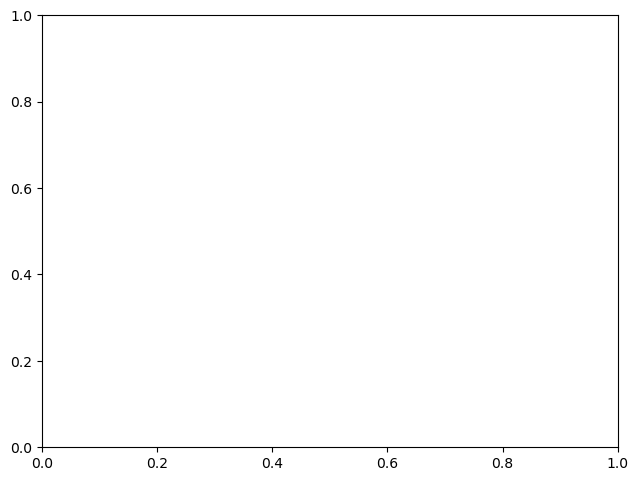

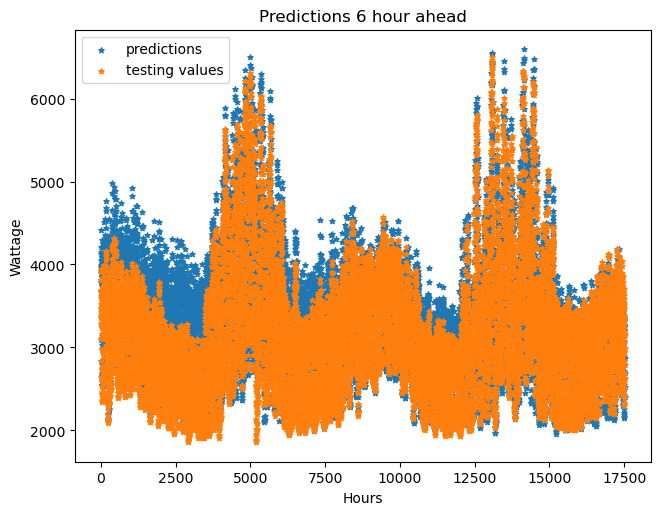

In [61]:
import matplotlib.pyplot as plt 

fig = plt.figure() 

axes = fig.add_axes([0.1, 0.1, 0.9, 0.9])
predictionsAdjusted = []
predictions = Tuples[0]

for i in predictions:
    for j in i: 
        predictionsAdjusted.append(j)

fig = plt.figure() 
Hours = [i for i in range(len(data[4]) *6)]

axes = fig.add_axes([0.1, 0.1, 0.9, 0.9])
axes.scatter(Hours, predictionsAdjusted, label = "predictions", s = 15,  marker = "*")
testingValuesAdjusted = [] 


for i in Tuples[1]: # getting the actual testing values. 
    for j in i: 
        testingValuesAdjusted.append(j)
axes.scatter(Hours, testingValuesAdjusted, label = "testing values",s = 15,  marker = "*")
axes.set_xlabel("Hours")
axes.set_ylabel("Wattage")
plt.title("Predictions 6 hour ahead")
axes.legend() 